## Log data munging and EDA

Just getting set up, testing

In [9]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'../')

import mysticbit
from mysticbit import munging, ml, plots

Do you really want to drill me?
Do you really want to make me cry
AH AH AH AH


In [3]:
df_logs = munging.load_log_data()

df_ml = munging.create_ml_dataframe(df_logs, feature_lags = range(10), label_lags = range(5))

df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'G08', 'B0700', 'G09', 'G15', 'B13', 'G06', 'G16', 'B12', 'G10', 'B08', 'B200', 'B14', 'G070', 'G17', 'G12'}
Test wells:  {'B03', 'B06', 'B05'}


In [4]:
X_cols = [c for c in df_ml_train.columns if 'lag' in c]
y_cols = [c for c in df_ml_train.columns if 'futr' in c]

print('X cols: ', X_cols)
print('y cols: ', y_cols)

X cols:  ['GR_lag_0', 'GR_lag_1', 'GR_lag_2', 'GR_lag_3', 'GR_lag_4', 'GR_lag_5', 'GR_lag_6', 'GR_lag_7', 'GR_lag_8', 'GR_lag_9']
y cols:  ['GR_futr_0', 'GR_futr_1', 'GR_futr_2', 'GR_futr_3', 'GR_futr_4']


In [5]:
models = ml.make_multiple_models(df_ml_train, X_cols, y_cols)

In [6]:
df_pred = ml.make_predictions(models, df_ml, X_cols, y_cols)

In [7]:
df_pred.head()

,HACKANAME,TVDSS,RES_ID,GR,GR_lag_0,GR_lag_1,GR_lag_2,GR_lag_3,GR_lag_4,GR_lag_5,...,GR_futr_0_pred_base,GR_futr_1_pred_base,GR_futr_2_pred_base,GR_futr_3_pred_base,GR_futr_4_pred_base,GR_futr_0_pred_low,GR_futr_1_pred_low,GR_futr_2_pred_low,GR_futr_3_pred_low,GR_futr_4_pred_low
0,B03,1583,3005.0,58.601429,58.601429,49.958333,55.180000,57.498000,36.400000,34.288000,...,58.974116,60.612389,59.645041,60.036796,59.107350,58.336405,41.964820,43.897251,42.100310,41.020944
1,B03,1584,3005.0,51.303333,51.303333,58.601429,49.958333,55.180000,57.498000,36.400000,...,51.412114,51.004935,52.379788,53.136031,44.845141,51.380918,41.077510,38.855483,39.387824,36.990107
2,B03,1586,3005.0,52.490000,52.490000,51.303333,58.601429,49.958333,55.180000,57.498000,...,52.448489,49.824650,50.388630,43.657371,41.661687,52.256301,43.354537,41.544542,38.124245,37.053815
3,B03,1587,3005.0,53.040000,53.040000,52.490000,51.303333,58.601429,49.958333,55.180000,...,53.634800,52.477318,48.510513,44.979255,44.110772,52.748267,41.363203,38.189203,38.654635,36.371405
4,B03,1591,3005.0,58.120000,58.120000,53.040000,52.490000,51.303333,58.601429,49.958333,...,57.527159,58.261064,56.546169,53.293625,53.011117,58.016980,45.468801,44.897491,39.110197,38.997609


In [8]:
well_name = 'B05'
bit_depth = 1800

predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
predictions.head()

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,model_name,TVDSS
0,B05,1800,GR_futr_0_pred_high,54.753956,0.0,GR,high,1800.0
1,B05,1800,GR_futr_1_pred_high,67.161374,1.0,GR,high,1801.0
2,B05,1800,GR_futr_2_pred_high,76.197768,2.0,GR,high,1802.0
3,B05,1800,GR_futr_3_pred_high,79.911951,3.0,GR,high,1803.0
4,B05,1800,GR_futr_4_pred_high,81.537620,4.0,GR,high,1804.0


In [10]:
 
def plot_predictions(df_logs, df_pred, well_name, bit_depth):
    try:
        f, ax = plots.make_log_plot(df_logs, well_name)
        predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
        
        plots.add_predictions(ax[0], predictions)
        
        for axs in ax:
            axs.set_ylim(1800, 1760)
        plt.show()
        
        print('updated')
        
    except AssertionError:
        f, ax = plots.make_log_plot(df_logs, well_name)
        print('no predictions found at this depth in this well')


interact(plot_predictions, df_logs=fixed(df_logs), df_pred=fixed(df_pred),
         well_name=fixed(well_name), bit_depth=(1760, 1800, 1));

interactive(children=(IntSlider(value=1780, description='bit_depth', max=1800, min=1760), Output()), _dom_clas…

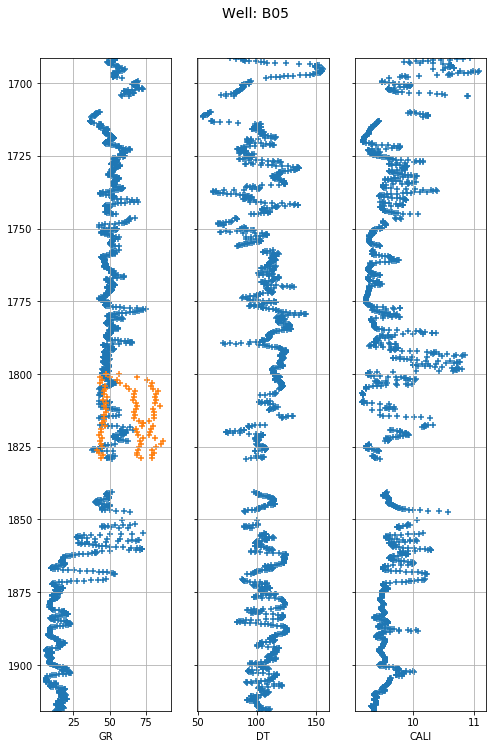

In [16]:
f, ax = plots.make_log_plot(df_logs, 'B05')
ax[0].scatter(predictions['value'], predictions['TVDSS'], marker='+')